# **5.1 Logistic Regression prediction**

<h1>Logistic Regression</h1>


<h2>Objective</h2><ul><li> How to create a logistic regression object with the nn.Sequential model.</li></ul> 


<h2>Preparation</h2>


We'll need the following libraries:  


In [1]:
# Import the libraries we need for this lab

import torch.nn as nn
import torch
import matplotlib.pyplot as plt 

In [2]:
# Set the random seed

torch.manual_seed(2)

<h2 id="Log">Logistic Function</h2>


The object is represented in the following diagram: 

logistic regression) linear function > pass output to logistic function > get yhat

2 ways to create logistic function


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.1.1_logistic_regression_block_diagram.png" width = 800, align = "center" alt="logistic regression block diagram" />


Create a tensor ranging from -100 to 100:


In [3]:
z = torch.arange(-100, 100, 0.1).view(-1, 1)
print("The tensor: ", z)

The tensor:  tensor([[-100.0000],
        [ -99.9000],
        [ -99.8000],
        ...,
        [  99.7000],
        [  99.8000],
        [  99.9000]])


Create a sigmoid object: 


In [4]:
# Create sigmoid object

sig = nn.Sigmoid() # better than threshold function. When z is large negative number, expression approx 0. When z is large positive value, approx 1. everythin middle, value btw 0 and 1, get local estimate

Apply the element-wise function Sigmoid with the object:


In [5]:
# Use sigmoid object to calculate the 

yhat = sig(z)

Plot the results: 


Text(0, 0.5, 'yhat')

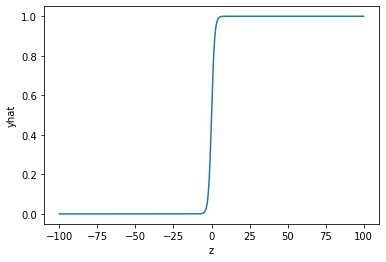

In [6]:
# plot of the output
plt.plot(z.numpy(), yhat.numpy())
plt.xlabel('z')
plt.ylabel('yhat')

Apply the element-wise Sigmoid from the function module and plot the results:


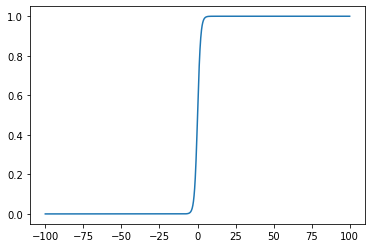

In [7]:
yhat = torch.sigmoid(z)
plt.plot(z.numpy(), yhat.numpy())

<h2 id="Seq">Build a Logistic Regression with <code>nn.Sequential</code></h2>
- really fast way to build logistic regression model

Create a 1x1 tensor where x represents one data sample with one dimension, and 2x1 tensor X represents two data samples of one dimension:


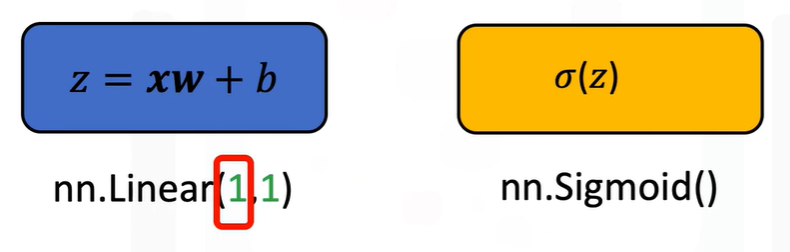

In [8]:
# Create x and X tensor

x = torch.tensor([[1.0]])
X = torch.tensor([[1.0], [100]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1.]])
X =  tensor([[  1.],
        [100.]])


Create a logistic regression object with the <code>nn.Sequential</code> model with a one-dimensional input:


In [9]:
# Use sequential function to create model

model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid()) # nn.Sequential : used to build neural network, 2 parameters in nn.Sequential

In this case, the parameters are randomly initialized. You can view them the following ways:


In [10]:
# Print the parameters

print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[0.2294]], requires_grad=True), Parameter containing:
tensor([-0.2380], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[0.2294]])), ('0.bias', tensor([-0.2380]))])


Make a prediction with one sample:


In [11]:
# The prediction for x

yhat = model(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.4979]], grad_fn=<SigmoidBackward>)


Calling the object with tensor <code>X</code> performed the following operation <b>(code values may not be the same as the diagrams value  depending on the version of PyTorch) </b>:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.1.1_logistic_functio_example%20.png" width="400" alt="Logistic Example" />


Make a prediction with multiple samples:


In [12]:
# The prediction for X

yhat = model(X)
yhat

tensor([[0.4979],
        [1.0000]], grad_fn=<SigmoidBackward>)

Calling the object performed the following operation: 


Create a 1x2 tensor where x represents one data sample with one dimension, and 2x3 tensor X represents one data sample of two dimensions:


In [13]:
# Create and print samples

x = torch.tensor([[1.0, 1.0]])
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1., 1.]])
X =  tensor([[1., 1.],
        [1., 2.],
        [1., 3.]])


Create a logistic regression object with the <code>nn.Sequential</code> model with a two-dimensional input: 


In [14]:
# Create new model using nn.sequential()

model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())

The object will apply the Sigmoid function to the output of the linear function as shown in the following diagram:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.1.1logistic_output.png" width="800" alt="The structure of nn.sequential"/>


In this case, the parameters are randomly initialized. You can view them the following ways:


In [15]:
# Print the parameters

print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[ 0.1939, -0.0361]], requires_grad=True), Parameter containing:
tensor([0.3021], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[ 0.1939, -0.0361]])), ('0.bias', tensor([0.3021]))])


Make a prediction with one sample:


In [16]:
# Make the prediction of x

yhat = model(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.6130]], grad_fn=<SigmoidBackward>)


The operation is represented in the following diagram:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.1.logisticwithouptut.png" width="500" alt="Sequential Example" />


Make a prediction with multiple samples:


In [17]:
# The prediction of X

yhat = model(X)
print("The prediction: ", yhat)

The prediction:  tensor([[0.6130],
        [0.6044],
        [0.5957]], grad_fn=<SigmoidBackward>)


The operation is represented in the following diagram: 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.1.1_logistic_with_outputs2.png" width="800" alt="Sequential Example" />


<h2 id="Model">Build Custom Modules</h2> using nn.Module


In this section, you will build a custom Module or class. The model or object function is identical to using <code>nn.Sequential</code>.


Create a logistic regression custom module:


In [18]:
# Create logistic_regression custom class - similar to linear regression. Only difference is that input already has sigmoid function

class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
    
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

Create a model to predict one dimension: 


In [20]:
# Create logistic regression model
# Comparison between custom model and sequential model

custom_model = logistic_regression(1) # 1 dimensional > pass 1 to linear constructor as our input is 1 dimensional

sequential_model = nn.Sequential(nn.Linear(1,1), nn.Sigmoid()) # pass 1 to linear constructor as our input is 1 dimensional
# same output

In [ ]:
model = logistic_regression(1)

In this case, the parameters are randomly initialized. You can view them the following ways:


In [21]:
# Print parameters 

print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[0.2381]], requires_grad=True), Parameter containing:
tensor([-0.1149], requires_grad=True)]

model.state_dict():
  OrderedDict([('linear.weight', tensor([[0.2381]])), ('linear.bias', tensor([-0.1149]))])


Create a 1x1 tensor where x represents one data sample with one dimension, and 3x1 tensor where $X$ represents one data sample of one dimension:


In [19]:
# Create x and X tensor

x = torch.tensor([[1.0]])
X = torch.tensor([[-100], [0], [100.0]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1.]])
X =  tensor([[-100.],
        [   0.],
        [ 100.]])


Make a prediction with one sample:


In [22]:
# Make the prediction of x

yhat = model(x) # input tensor passed to linear function, intermediate output passed to sigmoid function
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[0.5307]], grad_fn=<SigmoidBackward>)


Make a prediction with multiple samples: similar to single sample input


In [23]:
# Make the prediction of X

yhat = model(X)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[4.0805e-11],
        [4.7130e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward>)


**Multidimensional Logistic Regression**

Create a logistic regression object with a function with two inputs: multidimensional input


In [24]:
# Create logistic regression model

custom_2d_model = logistic_regression(2) # 2 Dimension

sequential_2d_model = nn.Sequential(nn.Linear(2,1),nn.Sigmoid())

In [ ]:
model = nn.Sequential(nn.Linear(2,1),nn.Sigmoid())

In [25]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.2381]], requires_grad=True), Parameter containing:
tensor([-0.1149], requires_grad=True)]


Create a 1x2 tensor where x represents one data sample with one dimension, and 3x2 tensor X represents one data sample of one dimension:


In [26]:
# Create x and X tensor

x = torch.tensor([[1.0, 2.0]])
X = torch.tensor([[100, -100], [0.0, 0.0], [-100, 100]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1., 2.]])
X =  tensor([[ 100., -100.],
        [   0.,    0.],
        [-100.,  100.]])


Make a prediction with one sample:


In [27]:
# Make the prediction of x

yhat = model(x)
print("The prediction result: \n", yhat)

RuntimeError: ignored

Make a prediction with multiple samples: 


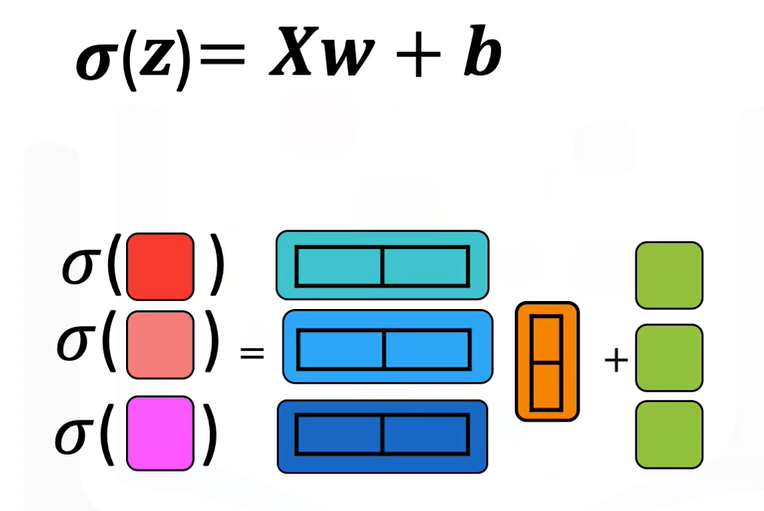

In [28]:
# Make the prediction of X

yhat = model(X)
print("The prediction result: \n", yhat)

RuntimeError: ignored

<h3>Practice</h3>


Make your own model <code>my_model</code> as applying linear regression first and then logistic regression using <code>nn.Sequential()</code>. Print out your prediction.


In [29]:
# Practice: Make your model and make the prediction

X = torch.tensor([-10.0])

Double-click <b>here</b> for the solution.

<!-- 
my_model = nn.Sequential(nn.Linear(1, 1),nn.Sigmoid())
yhat = my_model(X)
print("The prediction: ", yhat)
-->


# **5.2 Bad Initialization Logistic Regression with Mean square error**

<h1>Logistic Regression and Bad Initialization Value</h1>


<h2>Objective</h2><ul><li> How bad initialization value can affects the accuracy of model. .</li></ul> 


<h2>Preparation</h2>


In [30]:
# Import the libraries we need for this lab

import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

Helper functions 


The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the Parameter space during training and has nothing to do with Pytorch. 


In [31]:
class plot_error_surfaces(object):
    
    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - (1 / (1 + np.exp(-1*w2 * self.x - b2)))) ** 2)
                count2 += 1   
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        
# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

In [32]:
# Set random seed

torch.manual_seed(0)

<h2 id="Makeup_Data">Get Some Data </h2>


Create the <code>Data</code> class


In [33]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

Make <code>Data</code> object


In [34]:
# Create Data object

data_set = Data()

<h2 id="Model_Cost">Create the Model and Total Loss Function (Cost)</h2>


Create a custom module for logistic regression:


In [35]:
# Create logistic_regression class

class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

Create a logistic regression object or model: 


In [36]:
# Create the logistic_regression result

model = logistic_regression(1)

Replace the random initialized variable values with some predetermined values that will not converge:  


In [37]:
# Set the weight and bias

model.state_dict() ['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict() ['linear.bias'].data[0] = torch.tensor([[-10]])
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[-5.]])), ('linear.bias', tensor([-10.]))])


Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


<Figure size 432x288 with 0 Axes>

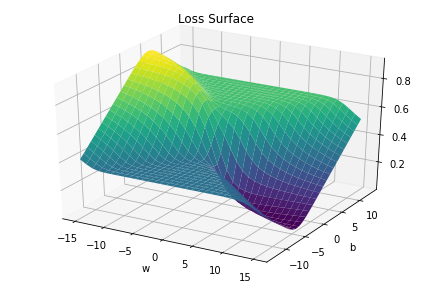

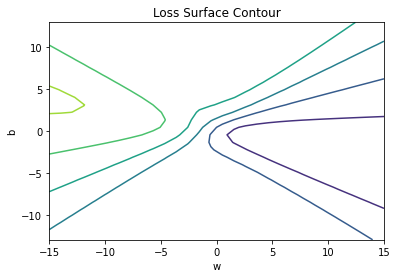

In [38]:
# Create the plot_error_surfaces object
# Contour line around this region(good location) <-> plane flat region. If random initialization in a good location, our algorithm will converge to a minimum. BAd region, nothing will happen.
get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)

Define the dataloader, the cost or criterion function, the optimizer: 


In [39]:
# Create dataloader object, crierion function and optimizer.

trainloader = DataLoader(dataset=data_set, batch_size=3)
criterion_rms = nn.MSELoss()
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

<a id="ref2"></a>

<h2 align=center>Train the Model via Batch Gradient Descent </h2>


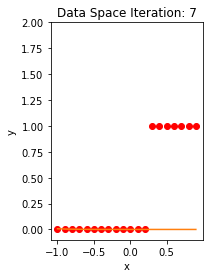

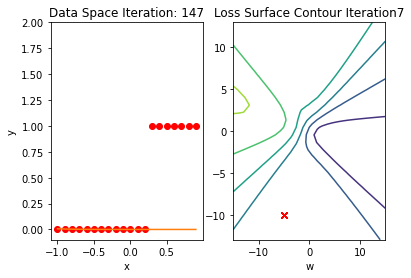

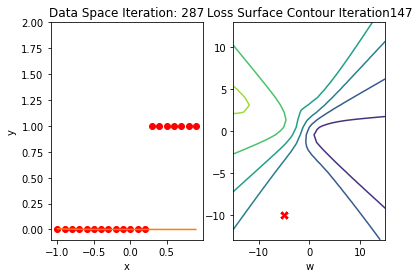

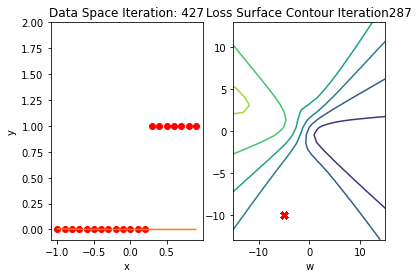

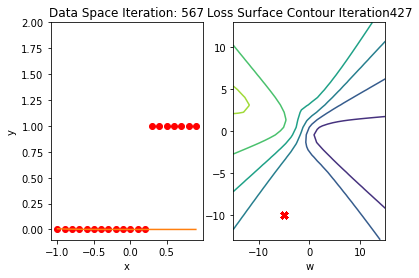

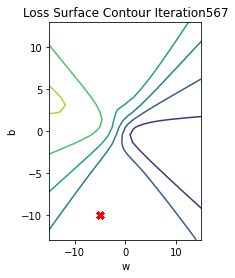

In [40]:
# Train the model

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader: 
            yhat = model(x)
            loss = criterion_rms(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            get_surface.plot_ps()

train_model(100)

Get the actual class of each sample and calculate the accuracy on the test data:


In [41]:
# Make the Prediction

yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(0.6500)


 Accuracy is 60% compared to 100% in the last lab using a good Initialization value. 


# **5.3 Cross entropy logistic regression**

<h1>Logistic Regression Training Negative Log likelihood (Cross-Entropy)</h1> 


<h2>Objective</h2><ul><li> How Cross-Entropy using random initialization influence the accuracy of the model.</li></ul> 

* when training linear classifiers, we wanna minimize number of misclassified samples. This is because if iout classifier classifies a high number of samples incorrectly during training > would not work well on actual test data. > minimize the loss - use loss/cost function

<h2>Preparation</h2>


In [42]:
# Import the libraries we need for this lab

import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with Pytorch. 


In [43]:
# Create class for plotting and the function for plotting

class plot_error_surfaces(object):
    
    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                yhat= 1 / (1 + np.exp(-1*(w2*self.x+b2)))
                Z[count1,count2]=-1*np.mean(self.y*np.log(yhat+1e-16) +(1-self.y)*np.log(1-yhat+1e-16))
                count2 += 1   
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        
# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

In [44]:


# Set random seed

torch.manual_seed(0)

<h2 id="Makeup_Data">Get Some Data</h2>


In [45]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
    
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

In [46]:
# Create Data object

data_set = Data()

<h2 id="Model_Cost">Create the Model and Total Loss Function (Cost)</h2>


Create a custom module for logistic regression:


In [47]:
# Create logistic_regression class

class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [48]:
# Create the logistic_regression result

model = logistic_regression(1)

Replace the random initialized variable values. Theses random initialized variable values did convergence for the RMS Loss but will converge for the Cross-Entropy Loss.


In [49]:
# Set the weight and bias

model.state_dict() ['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict() ['linear.bias'].data[0] = torch.tensor([[-10]])
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[-5.]])), ('linear.bias', tensor([-10.]))])


<Figure size 432x288 with 0 Axes>

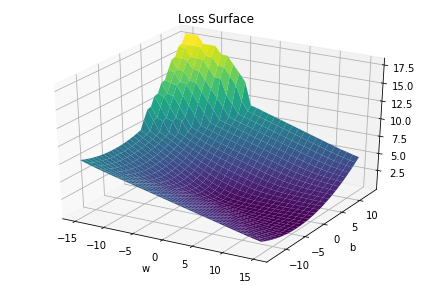

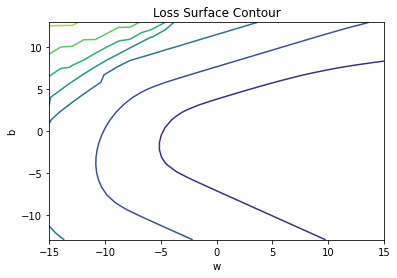

In [50]:
# Create the plot_error_surfaces object

get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)

Define the cost or criterion function: 


In [51]:
# Calculating loss : MSE
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)

In [52]:
# Calculating loss : MSE

criterion = nn.MSELoss() 

In [53]:
# Calculating loss : Cross entropy -> BCE
def criterion(yhat,y):
    out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
    return out

In [54]:
# Calculating loss : Cross entropy -> BCE
criterion = nn.BCELoss()

In [55]:
# Create dataloader, criterion function and optimizer
trainloader = DataLoader(dataset = data_set, batch_size = 3)
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

<h2 id="BGD">Train the Model via Batch Gradient Descent</h2>


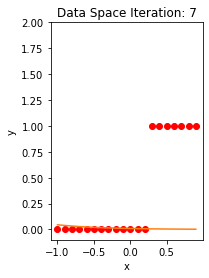

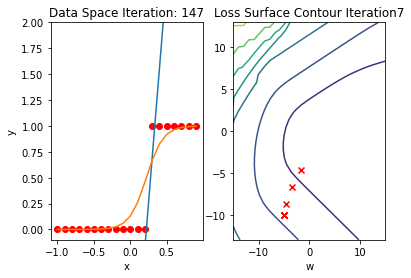

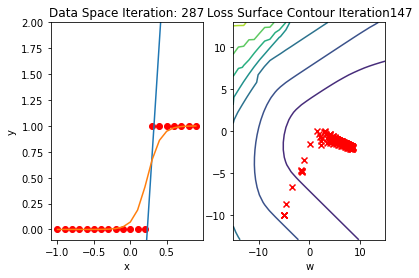

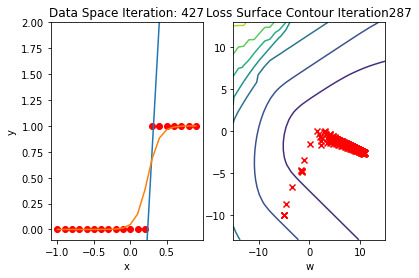

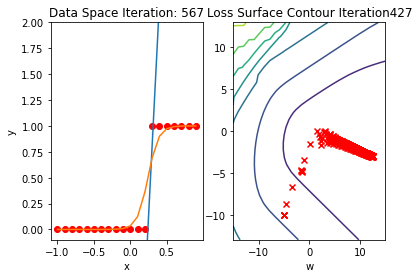

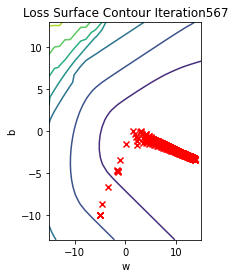

In [56]:
# Train the Model - logistic regression in pytorch

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            get_surface.plot_ps()
            
train_model(100)

Get the actual class of each sample and calculate the accuracy on the test data:


In [57]:
# Make the Prediction

yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(1.)


The accuracy is perfect.
